# OpenScope's Temporal Barcoding Dataset

FILL IN ABSTRACT HERE
DESCRIBE:
- background context
- experimental aim
- experimental design (with figures)
- brief overview of notebook

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

In [2]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import floor, ceil, isclose
from PIL import Image

%matplotlib inline

### The Experiment
As shown in the metadata table below, Openscope's Temporal Barcoding Experiment has produced _ main files on the [DANDI Archive](http://dandiarchive.org), with _ males and _ females. There are _ and _ genotypes. This table was generated from [Getting Experimental Metadata from DANDI](../basics/get_dandiset_metadata.ipynb).

In [3]:
# session_files = pd.read_csv("../../data/barcoding_sessions.csv")
# session_files

FileNotFoundError: [Errno 2] No such file or directory: '../../data/barcoding_sessions.csv'

In [4]:
# m_count = len(session_files["sex"][session_files["sex"] == "M"])
# f_count = len(session_files["sex"][session_files["sex"] == "F"])
# sst_count = len(session_files[session_files["genotype"].str.count("Sst") >= 1])
# pval_count = len(session_files[session_files["genotype"].str.count("Pval") >= 1])
# wt_count = len(session_files[session_files["genotype"].str.count("wt/wt") >= 1])

# print("Dandiset Overview:")
# print(len(session_files), "files")
# print(len(set(session_files["specimen_name"])), "subjects", m_count, "males,", f_count, "females")
# print(sst_count, "sst,", pval_count, "pval,", wt_count, "wt")

NameError: name 'session_files' is not defined

### Downloading Ecephys File
Change the values below to download the file you’re interested in. The `dandiset_id` for this project is `000563` . Set `dandi_filepath` to correspond to the dandiset id and filepath of the file you want.

In [5]:
dandiset_id = "000563"
dandi_filepath = "sub-692990/sub-692990_ses-1310924284_ogen.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.66.7) of dandi/dandi-cli is available. You are using 0.61.2


File already exists
Opening file


### Showing Probe Tracks
The images below were rendered using the [Visualizing Neuropixels Probe Locations](../visualization/visualize_neuropixels_probes.ipynb) notebook. The probes are using the [Common Coordinate Framework](https://community.brain-map.org/t/allen-mouse-ccf-accessing-and-using-related-data-and-tools/359) (CCF). The experiment uses six probes labeled A-F to target various regions. Note that any warping is do to the spatial adjustment from the subject brain to the rendered model brain.

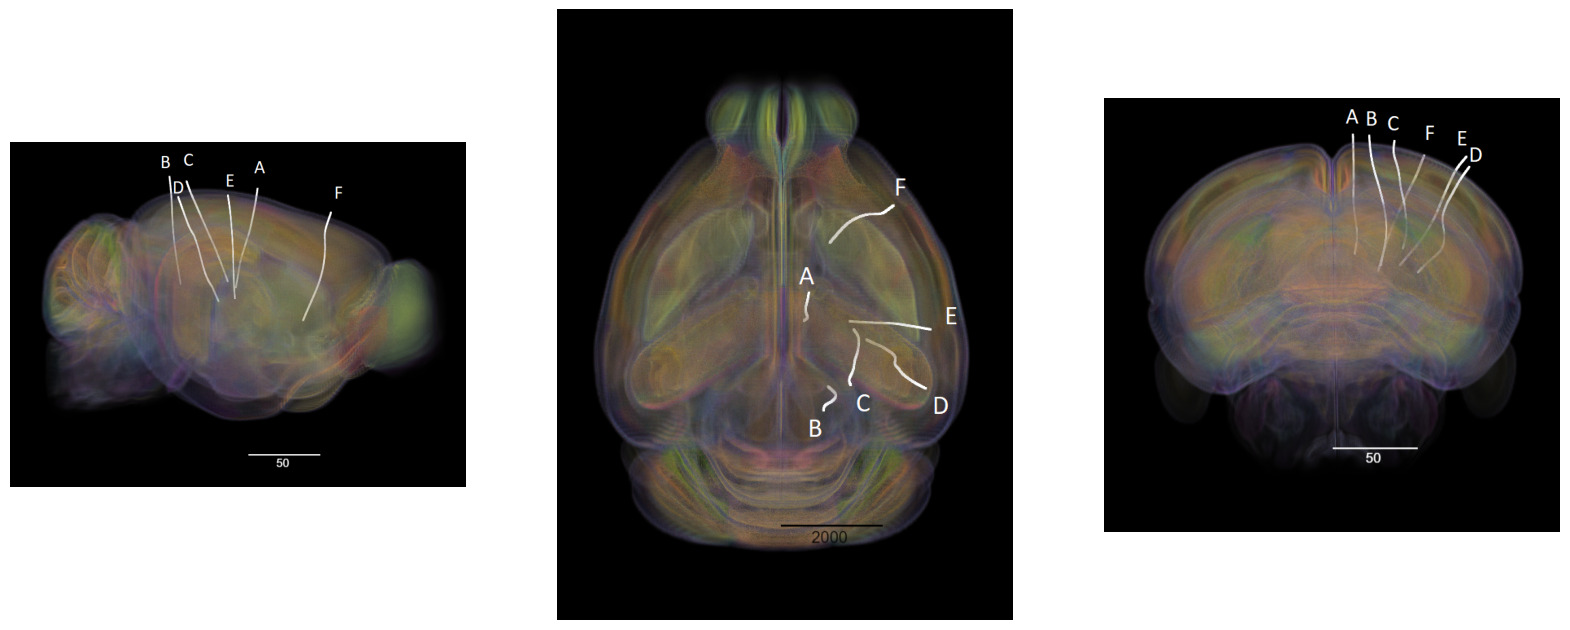

In [7]:
sagittal_view = Image.open("../../data/images/barcoding_probes_sagittal.png")
dorsal_view = Image.open("../../data/images/barcoding_probes_dorsal.png")
transverse_view = Image.open("../../data/images/barcoding_probes_transverse.png")
fig, axes = plt.subplots(1,3,figsize=(20,60))

axes[0].imshow(sagittal_view)
axes[1].imshow(dorsal_view)
axes[2].imshow(transverse_view)
for ax in axes:
    ax.axis("off")

### Extracting Units Spikes
Below, the `Units` table is retrieved from the file. It contains many metrics for every putative neuronal unit, printed below. For the analysis in this notebook, we are only interested in the `spike_times` attribute. This is an array of timestamps that a spike is measured for each unit. For more information on the various unit metrics, see [Visualizing Unit Quality Metrics](../visualization/visualize_unit_metrics.ipynb). From this table, the Units used in this notebook are selected if they have 'good' quality rather than 'noise', and if they belong in one of the regions of the primary visual cortex.

In [8]:
units = nwb.units
units[:10]

,cumulative_drift,local_index,velocity_above,max_drift,l_ratio,waveform_duration,silhouette_score,amplitude,repolarization_slope,waveform_halfwidth,...,spread,snr,recovery_slope,isolation_distance,presence_ratio,nn_miss_rate,isi_violations,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
18,326.80,0,0.343384,38.55,0.022780,0.700503,-1.000000,41.696265,0.173828,0.315913,...,30.0,2.332207,-0.032459,43.233220,0.99,0.022730,0.067300,"[20.02834939285158, 20.053715975435082, 20.206...","[9.330449579689514e-05, 9.21987862512398e-05, ...","[[0.0, -0.5187000000000006, -0.880815000000001..."
19,387.33,1,0.343384,32.90,0.035668,0.590620,0.094783,90.392055,0.278883,0.288442,...,30.0,2.479910,-0.051694,25.930641,0.99,0.012027,0.108665,"[19.989382855348147, 19.997249495939087, 20.11...","[7.55046589518177e-05, 7.76406774005736e-05, 8...","[[0.0, 0.29971500000000084, 0.0173550000000001..."
20,191.06,2,0.618090,28.28,0.023654,0.549414,0.165171,113.680710,0.371646,0.192295,...,40.0,2.820545,-0.034502,64.871842,0.99,0.034963,0.220767,"[19.820183416197224, 19.955382968048315, 20.00...","[0.00011376409341408817, 0.0001465055502538780...","[[0.0, 0.2870399999999991, -0.0202800000000007..."
21,297.55,3,1.098827,22.96,0.082525,0.673032,0.028362,103.689495,0.257032,0.247236,...,40.0,2.548181,-0.041078,27.613895,0.99,0.036976,0.123092,"[19.83501670036235, 19.850049983864526, 19.872...","[8.23568265836278e-05, 8.863397374487883e-05, ...","[[0.0, -0.1203149999999995, -0.177644999999999..."
22,426.78,4,-0.080123,36.88,0.070907,0.631826,0.049230,105.853215,0.244007,0.109883,...,90.0,2.214225,-0.043215,22.383728,0.99,0.022801,0.074316,"[20.60328082044715, 20.938113043904796, 20.954...","[8.292016805353676e-05, 7.960854906384916e-05,...","[[0.0, -0.4527899999999995, -0.917280000000000..."
23,284.03,5,-0.206030,13.67,0.012960,0.563149,0.068217,99.274695,0.254199,0.274707,...,40.0,2.512141,-0.033542,56.605299,0.99,0.017564,0.110058,"[20.09688249901673, 20.188582195057744, 20.207...","[0.00010583580023108926, 9.299711965686771e-05...","[[0.0, 0.19870500000000124, -0.184079999999999..."
24,270.06,6,-0.343384,16.35,0.003171,0.618090,0.116326,67.815930,0.163440,0.494472,...,90.0,1.847446,-0.032430,65.846874,0.99,0.003647,0.045345,"[19.8169834268043, 19.867083260737285, 19.8803...","[6.08313086626562e-05, 0.00010586688647749377,...","[[0.0, 0.3870750000000016, 0.802425000000001, ..."
25,225.15,7,0.412060,23.74,0.043039,0.535678,0.139515,129.241905,0.379787,0.206030,...,60.0,3.090060,-0.068937,43.310009,0.99,0.011039,0.102138,"[20.490147862118107, 20.700513831480098, 20.76...","[0.00013187288867882665, 0.000143900078542854,...","[[0.0, 0.7743449999999996, 0.4451850000000007,..."
26,234.30,8,0.343384,21.47,0.009869,0.604355,0.108146,143.537355,0.490725,0.164824,...,50.0,3.458361,-0.050589,49.281294,0.99,0.000990,0.077325,"[19.81555009822205, 19.84198334393653, 20.8690...","[0.0001282134223007106, 0.00016058485272967018...","[[0.0, 0.5374200000000002, -0.10413, -0.036269..."


In [9]:
# select electrodes
channel_probes = {}

electrodes = nwb.electrodes
for i in range(len(electrodes)):
    channel_id = electrodes["id"][i]
    location = electrodes["location"][i]
    channel_probes[channel_id] = location

# function aligns location information from electrodes table with channel id from the units table
def get_unit_location(row):
    return channel_probes[int(row.peak_channel_id)]

print(set(get_unit_location(row) for row in units))

{'SSp-bfd2/3', 'root', 'LH', 'SSp-bfd1', 'SCzo', 'RSPd6a', 'VISal6a', 'RSPv2/3', 'LP', 'VISal6b', 'VPM', 'SSp-bfd5', 'SSp-bfd4', 'SCop', 'RSPv1', 'VISal1', 'SCsg', 'LGv', 'IGL', 'VISal5', 'DG-mo', 'RSPd2/3', 'TH', 'VISal4', 'RSPagl5', 'VISpm4', 'RSPagl1', 'VISal2/3', 'MOp1', 'VISpm1', 'SCig', 'RSPv5', 'RSPd5', 'VISpm6b', 'MOp6a', 'CP', 'RSPv6b', 'CA3', 'RT', 'RSPagl2/3', 'LGd-sh', 'MOp5', 'CA1', 'LGd-co', 'VISpm5', 'DG-po', 'DG-sg', 'SSp-bfd6a', 'MOp2/3', 'RSPv6a', 'SCiw', 'VPL', 'CA2', 'VISpm6a', 'VISpm2/3', 'LGd-ip', 'RSPagl6a'}


In [10]:
### selecting units spike times

brain_regions = ["VISal1","VISal5","VISal6b","VISpm4","VISpm1","VISpm2/3","VISpm6a","VISpm5","VISal6a","VISal2/3","VISal4"]
select_criteria = lambda row: row.quality.item() == "good" and row.isi_violations.item() < 0.15 and row.firing_rate.item() > 5


# select units based if they have 'good' quality and exists in one of the specified brain_regions
units_spike_times = []
for location in brain_regions:
    location_units_spike_times = []
    for row in units:
        if get_unit_location(row) == location and select_criteria(row):
            location_units_spike_times.append(row.spike_times.item())
    units_spike_times += location_units_spike_times

print(f"Selected spike times from {len(units_spike_times)} units")

Selected spike times from 80 units


### Session Timeline
To get a good idea of the temporal structure of the stimulus throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that there is a period of random full field flashes, followed by repeated full field flashes and more random flashes. Then static block presentations and receptive field presentations. Finally, there is an optogenetic stimulation period.

In [11]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [12]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# manually add optotagging epoch since the table is stored separately
opto_stim_table = nwb.processing["optotagging"]["optogenetic_stimulation"]
opto_epoch = ("optogenetic_stimulation", 1.0, opto_stim_table.start_time[0], opto_stim_table.stop_time[-1])
epochs.append(opto_epoch)

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

6
('UniqueFFF_presentations', 0.0, 41.70058, 161.81776)
('RepeatFFF_presentations', 1.0, 161.81776, 882.43771)
('UniqueFFF_presentations', 2.0, 882.43771, 1002.53826)
('static_block_presentations', 3.0, 1002.53826, 6767.68327)
('receptive_field_block_presentations', 4.0, 6767.68327, 7248.085746666667)
('optogenetic_stimulation', 1.0, 7267.91448, 8138.04606)


In [13]:
time_start = floor(min([epoch[2] for epoch in epochs]))
time_end = ceil(max([epoch[3] for epoch in epochs]))
all_units_spike_times = np.concatenate(units_spike_times).ravel()
print(time_start, time_end)

# make histogram of unit spikes per second over specified timeframe
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(all_units_spike_times, bins=time_bin_edges)

41 8139


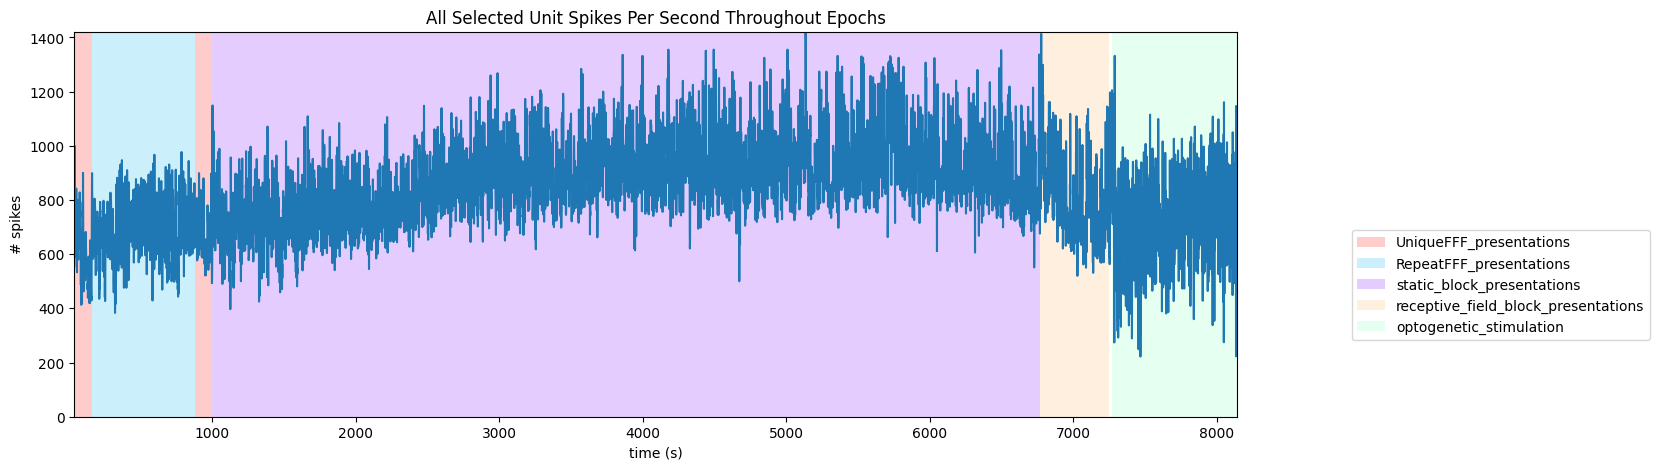

In [14]:
# generate plot of spike histogram with colored epoch intervals and legend
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, 0), epoch_end-epoch_start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")
ax.set_title("All Selected Unit Spikes Per Second Throughout Epochs")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.18, 0.25))
ax.plot(bins[:-1], hist)

### Extracting Stimulus Times
Different types of stimuli require different kinds of inclusion criteria. The various stimulus tables are shown below in `nwb.intervals`. Here, the repeated full field flashes, `RepeatFFF_presentations` is chosen for the barcoding analysis.

In [15]:
nwb.intervals.keys()

dict_keys(['RepeatFFF_presentations', 'UniqueFFF_presentations', 'invalid_times', 'receptive_field_block_presentations', 'static_block_presentations'])

In [16]:
stim_table_name = "RepeatFFF_presentations"

In [17]:
stim_table = nwb.intervals[stim_table_name]
stim_table[:10]

,start_time,stop_time,stimulus_name,stimulus_block,index_repeat,contrast,mask,opacity,orientation,phase,spatial_frequency,size,units,stimulus_index,color,tags,timeseries
id,,,,,,,,,,,,,,,,,
0,161.81776,161.83444,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7200, 1, timestamps pynwb.base.TimeSeries at..."
1,161.83444,161.85113,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7201, 1, timestamps pynwb.base.TimeSeries at..."
2,161.85113,161.86781,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(7202, 1, timestamps pynwb.base.TimeSeries at..."
3,161.86781,161.88448,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,-1.0,[stimulus_time_interval],"[(7203, 1, timestamps pynwb.base.TimeSeries at..."
4,161.88448,161.90117,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7204, 1, timestamps pynwb.base.TimeSeries at..."
5,161.90117,161.91785,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7205, 1, timestamps pynwb.base.TimeSeries at..."
6,161.91785,161.93453,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7206, 1, timestamps pynwb.base.TimeSeries at..."
7,161.93453,161.95120,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7207, 1, timestamps pynwb.base.TimeSeries at..."
8,161.95120,161.96788,RepeatFFF,1.0,0.0,1.0,None,1.0,0.0,"[0.0, 0.0]","[0.0, 0.0]","[250.0, 250.0]",deg,1.0,1.0,[stimulus_time_interval],"[(7208, 1, timestamps pynwb.base.TimeSeries at..."


### Computing Barcodes
To get the neuronal barcodes in response to the full field flashes, the spike trains for each neuron must be retrieved, where each element of the spike train is the time (in seconds since the beginning of the session) that a spike occurred. With the spike trains and some information from the full field flashes table, the neurons spikes can be aligned into the 8 second trial window for each of the 90 trials.

In [18]:
# pull out some stimulus details we will need for our analysis
StimIndexList=np.unique(np.array((stim_table["stimulus_index"])) )  # array of stimulus conditions 
IndexRepeatList=np.unique(np.array((stim_table["index_repeat"]))) # array of repeat numbers within the block 
StimNameList=set(stim_table["stimulus_name"])
nPresentations=len(StimIndexList); # determine number of instances from the data
# determine nRepeats from the data
nRepeats=len(IndexRepeatList)
print(stim_table_name,' was repeated ',nRepeats,' times')

RepeatFFF_presentations  was repeated  90  times


In [52]:
# Find the start times of the repeated stimulus
#cast the index_repeat and stim_index columns from  hdmf.common.table.VectorData into arrays
index_repeat=np.array(stim_table["index_repeat"])  
stim_index=np.array(stim_table["stimulus_index"])
# note that the repeats are not necessarily back to back so the duration is determined by 
# the end time of the same repeat, not the start time of the next repeat
stim_times=np.zeros(nRepeats*nPresentations)
endtime=np.zeros(nRepeats*nPresentations)
for k in range(nPresentations): #loop over presentations of this stimulus
    mask1=stim_index==StimIndexList[k] #true for all elements in this presentation
    for j in range(nRepeats):   #loop over repeats within the presentation
        mask2=index_repeat==j #true for all elements with this repeat number
        ind1=np.where(np.logical_and(mask1,mask2))[0][0] # index of first element meeting conditoins
        stim_times[k*nRepeats+j]= stim_table["start_time"][ind1]

        ind2=np.where(np.logical_and(mask1,mask2))[0][-1]  # index of last element meeting conditoins
        endtime[k*nRepeats+j]= stim_table["stop_time"][ind2]

# the actual duration of each repeat is given by end_time-start_time
# average these to get the nominal duration for all trials, for further analysis
eachduration=endtime-stim_times # the values should be close to identical (check this)
trial_duration=np.mean(eachduration) # then set the "duration" variable to the mean duration 
trial_duration=np.round(trial_duration*1000)/1000  #truncated to three significant digits

In [53]:
# helper function that extracts and aligns spike times for one unit
# returns a 2D list with len of nRepeats, where each element is a spike train (list of timestamps)
def makeAlignedEvents(spike_times,stim_times,duration:float):
    """
    INPUTS:
    spike_times     array of spike times of a single unit, in seconds
    stim_times      array of start times of a repeated stimulus, in seconds
    duration        duration of the repeated stimulus, in seconds
    
    OUTPUTS:
    events          1D array whose elements are all times when a spike is seen in a repeat relative to the start of repeat
  
    """
    nRepeats=len(stim_times) #number of stim_time entries would give us the number of repeats for that stimulus
    events=np.zeros((nRepeats,)).tolist()
    
    for stim_idx, stim_time in enumerate(stim_times): 
        first_spike_in_range, last_spike_in_range = np.searchsorted(spike_times, [stim_time, stim_time+duration])
        spike_times_in_range = np.array(spike_times[first_spike_in_range:last_spike_in_range])  
        spike_times_in_range=spike_times_in_range-stim_time #set trial start as time 0 
        events[stim_idx]=spike_times_in_range.tolist()

    return events

In [61]:
trial_spike_trains = [makeAlignedEvents(spike_times,stim_times,trial_duration) for spike_times in units_spike_times]
print(f"Got trial spike trains for {len(trial_spike_trains)} neurons")
print(f"Each neuron has {len(trial_spike_trains[0])} spike trains (one for each trial)")

Got trial spike trains for 80 neurons
Each neuron has 90 spike trains (one for each trial)


#### Plotting Rasters
To visualize the responses of neurons we can plot the times of spikes relative to the stimulus onset time, from the trial spike trains that were just computed. In a spike raster plot like these, the x axis is time in seconds, the y axis is repeat number, and each dot is the time of one spike. When spikes appear at the same time in every trial, we see a vertical stripe in the raster. Units that have such vertical stripes look like "barcodes", hence the name of this project.

In [23]:
# plot barcodes for the first n_plots neurons
n_plots = 50

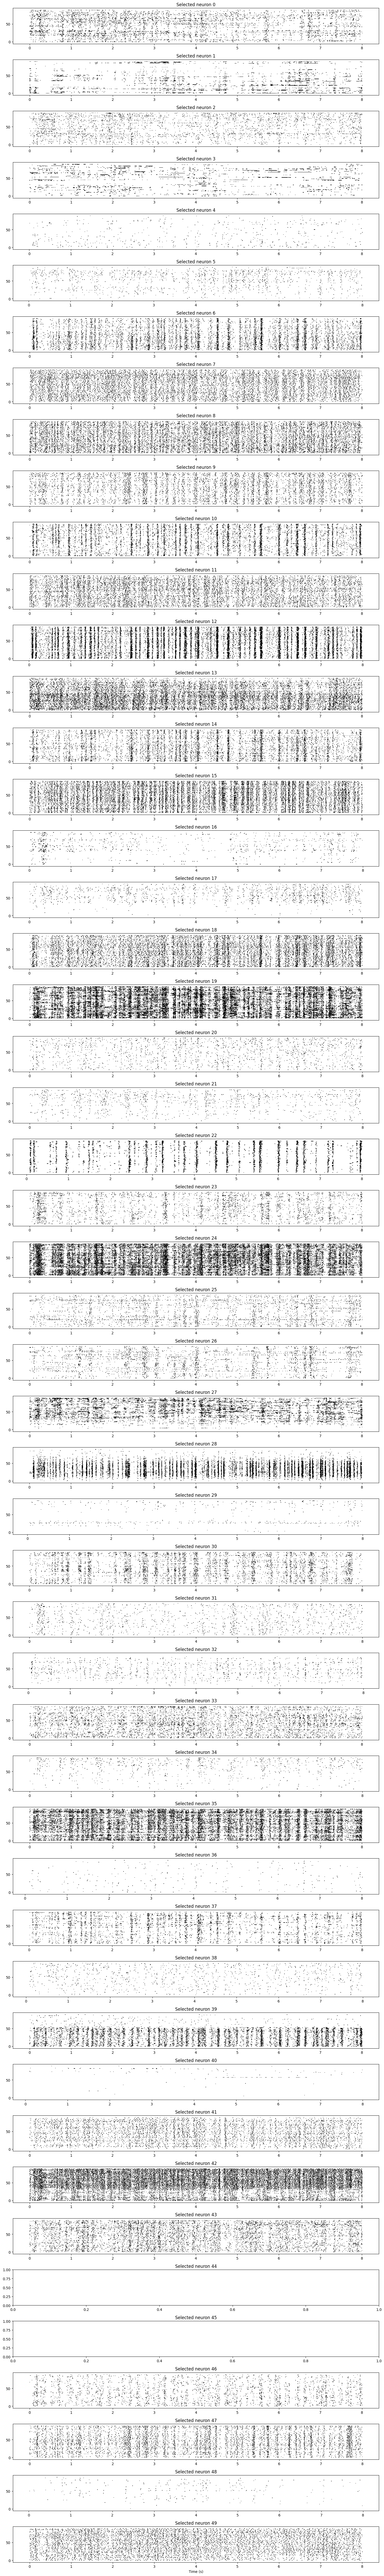

In [24]:
fig, axes = plt.subplots(n_plots, figsize=(15, n_plots*2))  # 1 row, 3 columns

for i in range(n_plots):
    axes[i].eventplot(trial_spike_trains[i], colors="black")
    axes[i].set_title(f"Selected neuron {i}")
axes[-1].set_xlabel("Time (s)")

# Adjust layout
plt.tight_layout()
plt.show()

### Getting PSTHs
Now that many barcodes can be seen in the plots above, we'd like a way to more clearly express the barcode. The Barcode of the cell is defined as the times of these precisely aligned firing events
One way to extract those times is to find the peaks in the peri-stimulus time histogram (PSTH).

In [25]:
neurons = [6,10,12] # chosen from plot above, feel free to change
bin_duration = 0.008
spike_threshold = 19
expandedView = None # set to a pair such as [2,4] to zoom in on plots below

In [26]:
# Helper function to compute PSTH by assigning spike times to time bins
def compute_psth(spike_trains, total_duration, bin_duration):
    n_bins = int(total_duration / bin_duration)
    psth = np.zeros(n_bins, dtype=float)
    for train in spike_trains:
        binned_spikes = np.floor(np.array(train) / bin_duration).astype(int)
        valid_bins = binned_spikes[binned_spikes < n_bins]
        psth[valid_bins] += 1
    psth /= len(spike_trains)
    return psth

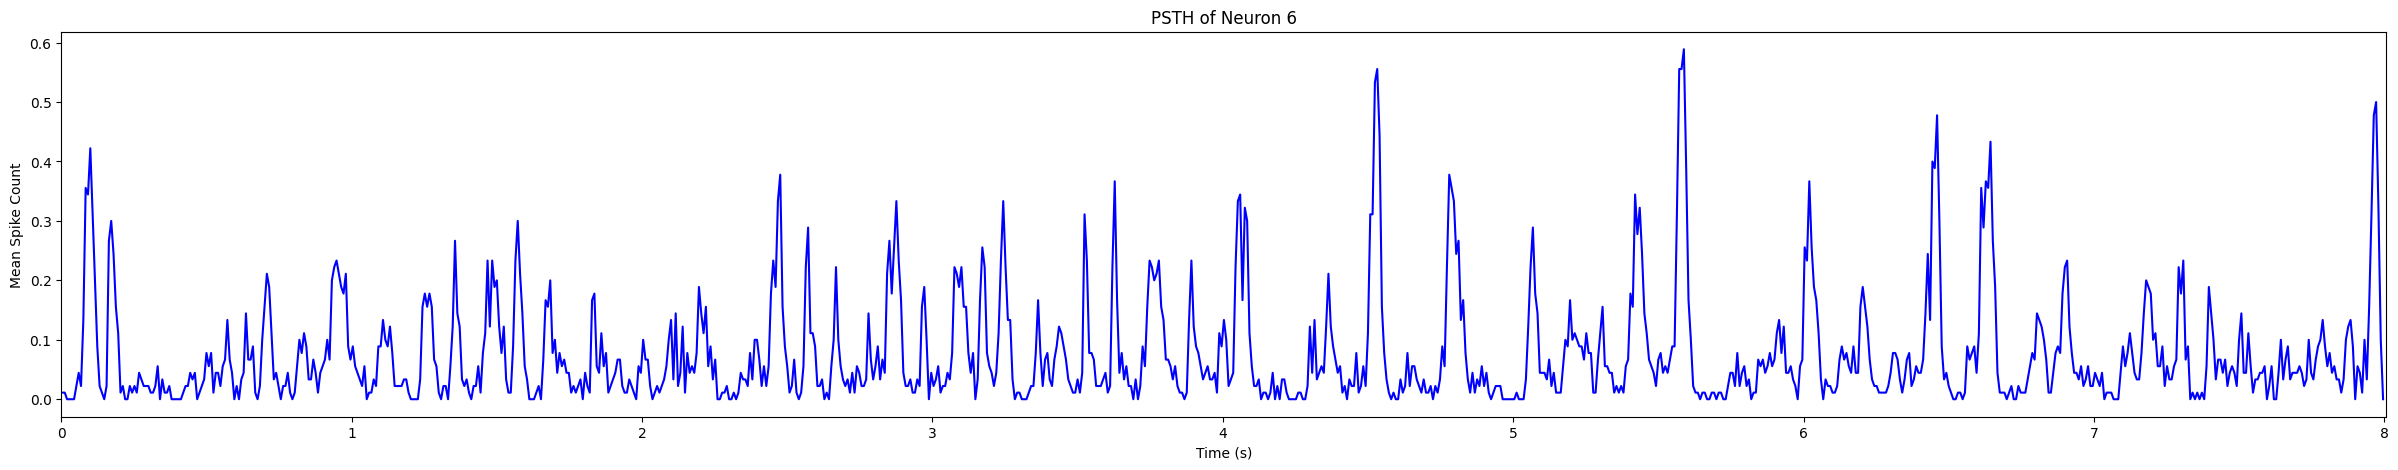

In [27]:
# Plot the psth of one of the example neurons 
psth1=compute_psth(trial_spike_trains[neurons[0]], trial_duration, bin_duration)
n_bins = len(psth1) 
bin_midpoints = (np.arange(n_bins) + 0.5) * bin_duration
fig, ax = plt.subplots(figsize=(30, 5))
plt.plot(bin_midpoints, psth1, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Mean Spike Count')
plt.title(f'PSTH of Neuron {neurons[0]}')
plt.xlim([0,trial_duration])
plt.show()

In [28]:
# Helper function versions of the above algorithm
# turn the code above into a helper function to return bar codes for any spiketrain
def find_bars(spike_train, trial_duration, bin_duration,min_spikes):
    nRepeats=len(spike_train)
    psth=compute_psth(spike_train, trial_duration, bin_duration)
    significant_array = psth*nRepeats >  min_spikes
    significant_indices = np.where(significant_array)[0] #indexes to qualifying time bins
    n_bins = len(psth) 
    bin_midpoints = (np.arange(n_bins) + 0.5) * bin_duration

    # Consecutive qualifying time bins are considered part of the same "Bar"
    # The time of that bar is considered to be the mean of those bin centers
    bars = []
    current_group = []
    for idx in significant_indices:
        if not current_group or idx == current_group[-1] + 1:
            current_group.append(idx)
        else:
            bars.append(np.mean(bin_midpoints[current_group]))
            current_group = [idx]
    if current_group:
        bars.append(np.mean(bin_midpoints[current_group]))

    return bars,psth,significant_indices,bin_midpoints

In [29]:
# turn the code above into a function to plot bar codes on a psth
# replot the PSTH, expanding the axis, color coding the significant points, and labeling the bar times
def plotPSTHbarcode(psth, bin_midpoints, threshold, significant_indices, bars, xlim=None):
    fig, ax = plt.subplots(figsize=(30, 5))
    plt.plot(bin_midpoints, psth, label='PSTH',color='blue')
    plt.xlabel('Time (s)')
    plt.ylabel('Mean Spike Count')
    plt.title('PSTH')
    if xlim is not None:
        plt.xlim(xlim)

    # Plot threshold in red, points exceeding threshold in green
    plt.plot(bin_midpoints, threshold*np.ones_like(bin_midpoints), label='Threshold', color='red')
    plt.scatter(bin_midpoints[significant_indices], psth[significant_indices], color='green', label='Above Thresh', zorder=5)
    
    #show inferred bar times
    bar_offset = max(psth) * 1.2
    bar_height = max(psth) * 0.05
    for i, bar_x in enumerate(bars):
        if i == 0:
            plt.plot([bar_x, bar_x], [bar_offset, bar_offset + bar_height], color='black', lw=1, label='Bars')
        else:
           plt.plot([bar_x, bar_x], [bar_offset, bar_offset + bar_height], color='black', lw=1)
    plt.legend()
    plt.show()

In [30]:
# Compute the barcodes of all sample units
# each tuple of barcode_data is of the form (barcode, psth, sig_indices, midpoints)
barcode_data = []
for neuron_idx in neurons:
    barcode_data.append(find_bars(trial_spike_trains[neuron_idx], trial_duration, bin_duration, spike_threshold))

for i, (barcode, psth, sig_indices, midpoints) in enumerate(barcode_data):
    print(f"Neuron {i} has a barcode of length {len(barcode)}")

Neuron 0 has a barcode of length 37
Neuron 1 has a barcode of length 41
Neuron 2 has a barcode of length 57


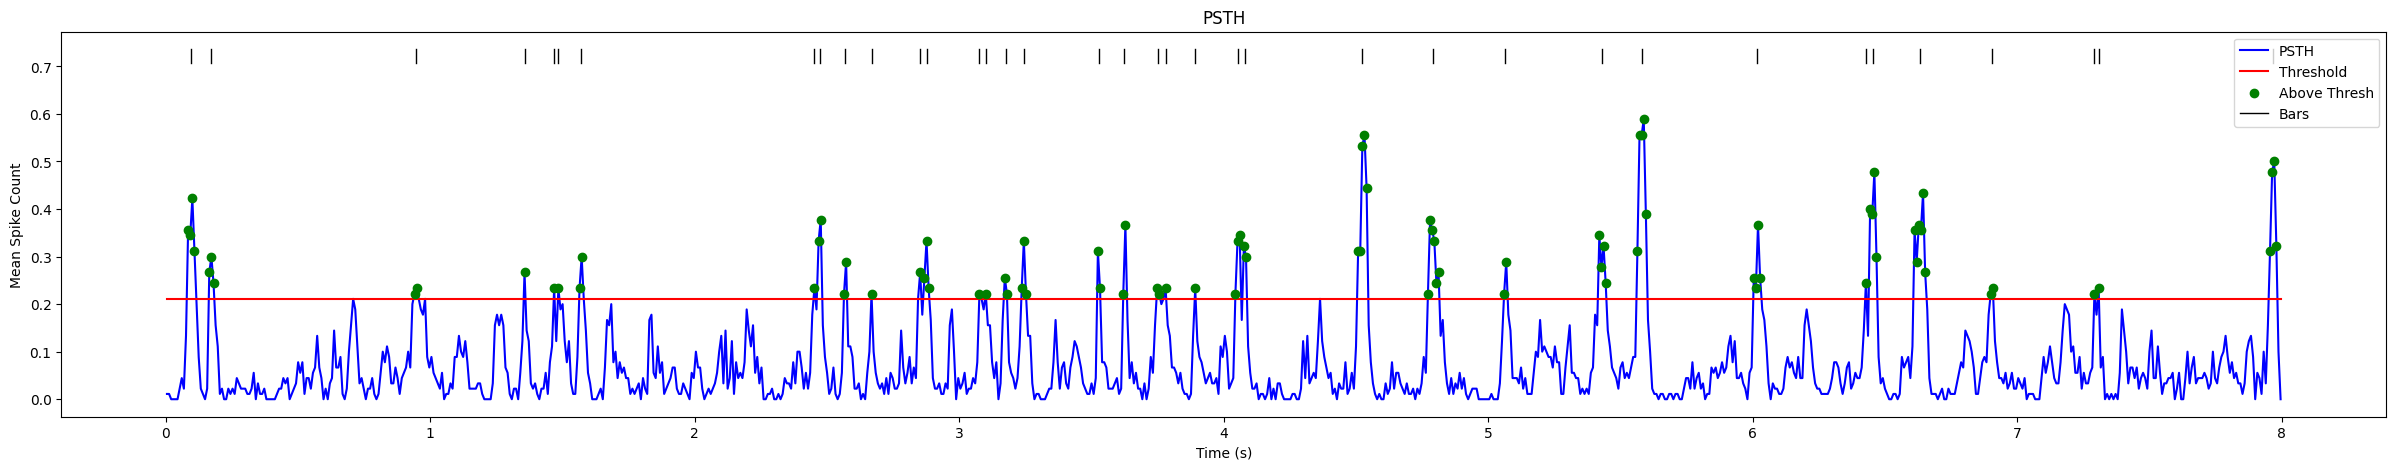

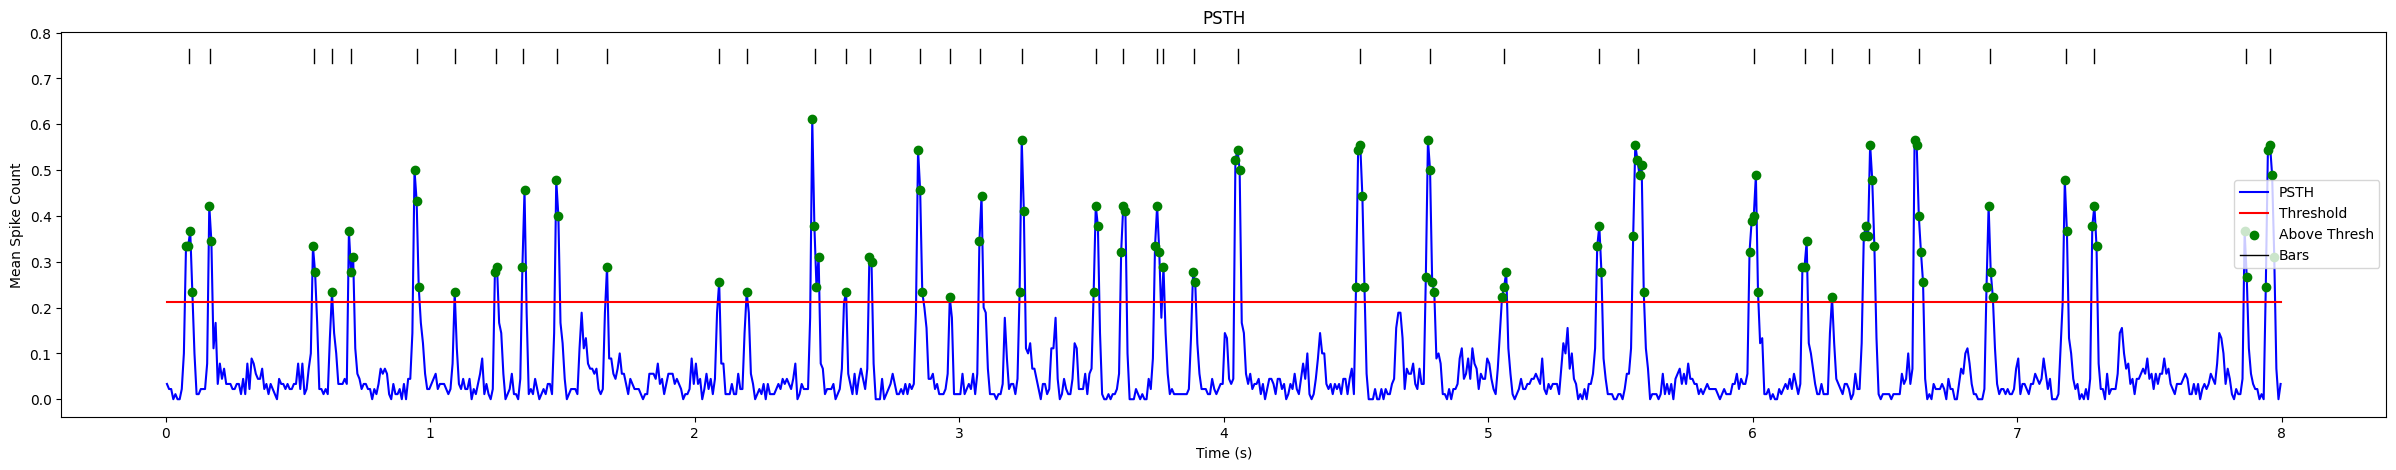

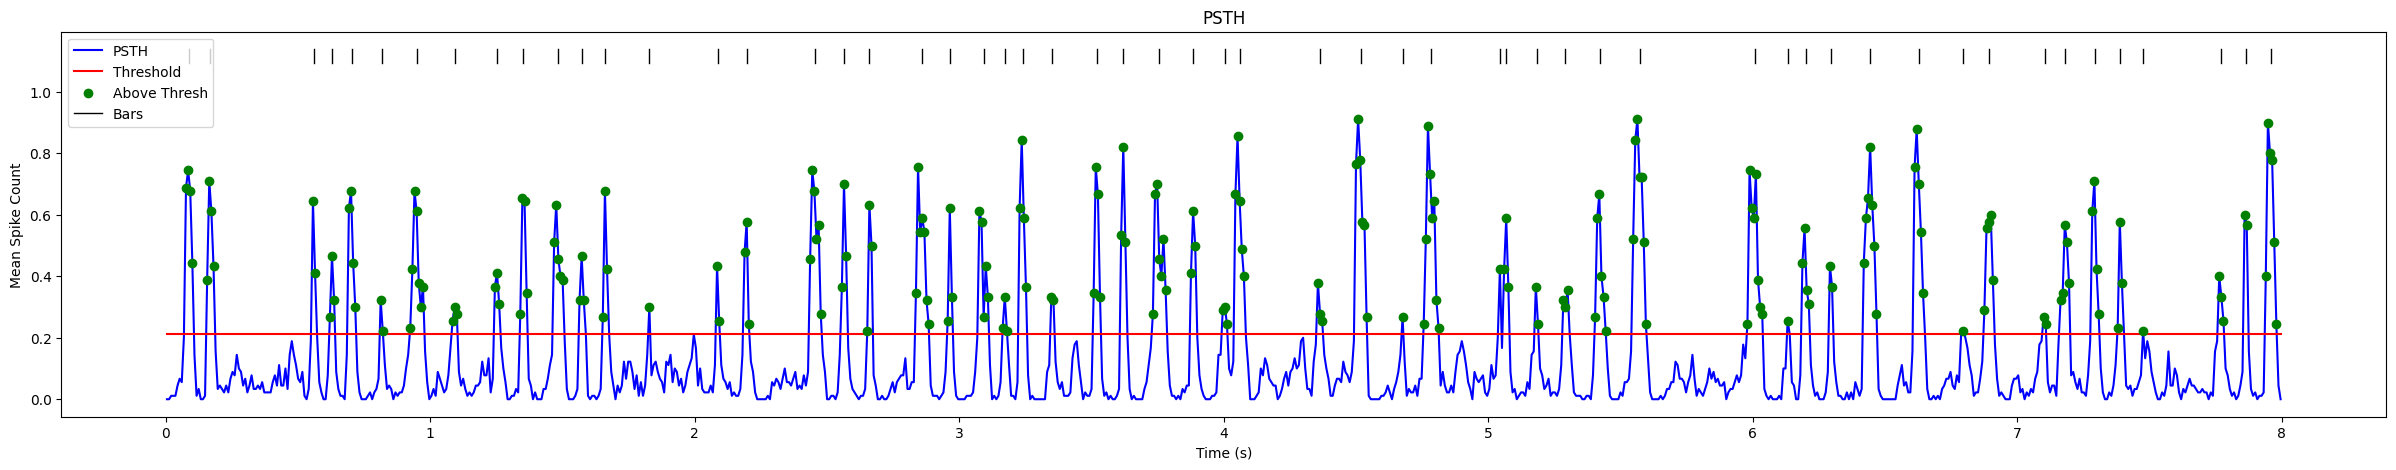

In [31]:
for barcode, psth, sig_indices, midpoints in barcode_data:
    plotPSTHbarcode(psth, midpoints, spike_threshold/nRepeats, sig_indices, barcode)

In [32]:
# bar times of selected neuron
print(f"Bar times of neuron {neurons[0]}:\n {np.round(barcode_data[0][0],3)}")

Bar times of neuron 6:
 [0.096 0.172 0.944 1.356 1.468 1.484 1.568 2.452 2.472 2.568 2.668 2.852
 2.876 3.076 3.1   3.176 3.244 3.528 3.624 3.752 3.78  3.892 4.052 4.08
 4.524 4.792 5.064 5.432 5.58  6.016 6.428 6.456 6.632 6.904 7.292 7.308
 7.968]


### Computing Distances Between Barcodes
One way to quantify the similarity between two bar code is an **edit distance metric** 
(the same principle used to align and compare genetic sequences)
 
The **Victor-Purpura distance** measures the minimum number of operations to transform one spike train into another.
There are three legal operations:

1. **Deleting a Spike**  
   - Remove a spike from one train if it doesn’t match any spike in the other train.

2. **Adding a Spike** 
   - Insert a spike into a train to align it with the other train.

3. **Shifting a Spike** (Cost depends on how far you shift):
   - Adjust the timing of a spike to align it with a spike in the other train.
   - The cost of shifting depends on how far the spike moves, scaled by the `cost` parameter.

Citation: Victor JD, Purpura KP. Nature and precision of temporal coding in visual cortex: a metric-space analysis. J Neurophysiol. 1996;76(2):1310-26. Epub 1996/08/01. doi: 10.1152/jn.1996.76.2.1310.  

In [33]:
# Here is a helper function implementing a simple algorithm to compute the minimum edit distance  
def spkd(tli, tlj, cost):
    '''
    Determines the minimum number of operations required to convert one bar code into the other 
    where the legal steps are to add a bar, delete a bar, or move a bar over by cost seconds
    INPUTS:
    tli        array of event times in one example, in seconds
    tlj        array of event times in another example, in seconds
    cost       number of seconds you can shift an event for the same cost as deleting or adding a spike
    
    OUTPUTS:
    d          the distance between i and j 
  
    Translated to Python by Siddharth Vyasabattu 2025 from Matlab code by Daniel Reich
    Translated to Matlab by Daniel Reich 1999 from FORTRAN code by Jonathan Victor
    (used with permission from JV)
    
    '''
    nspi = len(tli)
    nspj = len(tlj)

    if cost == 0:
        return abs(nspi - nspj)
    elif cost == float('inf'):
        return nspi + nspj

    # Initialize the cost matrix
    scr = np.zeros((nspi + 1, nspj + 1))

    # Margins with the cost of adding a spike
    scr[:, 0] = np.arange(nspi + 1)
    scr[0, :] = np.arange(nspj + 1)

    # Calculate the costs for aligning spike trains
    if nspi > 0 and nspj > 0:
        for i in range(1, nspi + 1):
            for j in range(1, nspj + 1):
                scr[i, j] = min(
                    scr[i - 1, j] + 1,
                    scr[i, j - 1] + 1,
                    scr[i - 1, j - 1] + cost * abs(tli[i - 1] - tlj[j - 1])
                )
    d = scr[nspi, nspj]  #the distance metric
    return d

In [34]:
# Let's just compare two fictional barcocdes
example_barcode_1 = [2, 3, 7]
example_barcode_2 =[2.1, 5, 7.2]
example_barcode_1, example_barcode_2

([2, 3, 7], [2.1, 5, 7.2])

In [35]:
cost = 1 # cost per 1s shift in a spike time
spkd(example_barcode_1, example_barcode_2, cost)

2.3000000000000003

In [36]:
barcode_0 = barcode_data[0][0]
barcode_1 = barcode_data[1][0]

- Any bar code can be converted to any other bar code for **some** cost. If they are identical the cost will be 0.

- What cost should we epect on chance if the bar codes are not really related?

- We can make a control bar code by **circularly permuting** the real bar code. This preserves the number of bars and the intervals between them, but destroys their alignment with the visual stimulus.

Optional Exercises
- Modify the cost parameter to see how the distance changes. 
- Try computing the distance by hand using the algorithm above
- Is the distance from neuron1 to neuron2 the same as the distance from neuron2 to neuron1?

In [37]:
##### Now compute the distances between two neurons' barcodes:
print(f'Neuron {neurons[0]} has {len(barcode_0)} bars in its barcode')
print(f'Neuron {neurons[1]} has {len(barcode_1)} bars in its barcode')
print(f'Worst case, deleting all of Neuron {neurons[0]} bars and inserting all of Neuron {neurons[1]} bars')
print('would cost ',len(barcode_0),' + ',len(barcode_1),' = ',len(barcode_0)+len(barcode_1))
cost=.2 
# The distance between the full length barcodes
d=spkd(barcode_0, barcode_1, cost)
print('For a shift cost of ',cost,' the distance is = ',d)

Neuron 6 has 37 bars in its barcode
Neuron 10 has 41 bars in its barcode
Worst case, deleting all of Neuron 6 bars and inserting all of Neuron 10 bars
would cost  37  +  41  =  78
For a shift cost of  0.2  the distance is =  5.160799999999999


In [38]:
# To circularly permute one of the two barcodes, we apply a random time shift to all the events. 
# If an event’s new time exceeds the total duration of the trial, it wraps around to the beginning 
# using modular arithmetic. To illustrate suppose a barcode had bars at 2, 4 and 7s
examplebarcode=[2,4,7]
print('example bar code = ',examplebarcode)

# and suppose the random offset was 1.5s
offset = 1.5
print('offset = ', offset)

# this adds the offset to each bar's time
for i in range(len(examplebarcode)):
    examplebarcode[i] += offset
print('shifted bar code = ',examplebarcode)
print('stimulus duration = ',trial_duration)

# this wraps the values exceeding the trial duration back to 
# the beginning and sorts them in order again
permutedexample = np.sort( examplebarcode % trial_duration )
print('permuted bar code = ',permutedexample)

example bar code =  [2, 4, 7]
offset =  1.5
shifted bar code =  [3.5, 5.5, 8.5]
stimulus duration =  8.007
permuted bar code =  [0.493 3.5   5.5  ]


In [39]:
# To circularly permute one of the two barcodes, we apply a random time shift to all the events. 
# If an event’s new time exceeds the total duration of the trial, it wraps around to the beginning 
# using modular arithmetic. To illustrate suppose a barcode had bars at 2, 4 and 7s
examplebarcode=[2,4,7]
print('example bar code = ',examplebarcode)

# and suppose the random offset was 1.5s
offset = 1.5
print('offset = ', offset)

# this adds the offset to each bar's time
for i in range(len(examplebarcode)):
    examplebarcode[i] += offset
print('shifted bar code = ',examplebarcode)
print('stimulus duration = ',trial_duration)

# this wraps the values exceeding the trial duration back to 
# the beginning and sorts them in order again
permutedexample = np.sort( examplebarcode % trial_duration )
print('permuted bar code = ',permutedexample)

example bar code =  [2, 4, 7]
offset =  1.5
shifted bar code =  [3.5, 5.5, 8.5]
stimulus duration =  8.007
permuted bar code =  [0.493 3.5   5.5  ]


In [40]:
# helper function to permute barcodes
def permute_barcode(barcode,duration):
    random_offset = np.random.uniform(0, duration)
    for i in range(len(barcode)):
        barcode[i] += random_offset
    permutedcode = np.sort(barcode % duration)
    return permutedcode

In [41]:
permuted_barcode1 = permute_barcode(barcode_0, trial_duration)
control_d=spkd(permuted_barcode1, barcode_1, cost)
print('For a shift cost of ',cost)
print('Distance from neuron1 to neuron2 was ',np.round(d,1))
print('Distance from permuted neuron1 to neuron2 was ',np.round(control_d,1))

For a shift cost of  0.2
Distance from neuron1 to neuron2 was  5.2
Distance from permuted neuron1 to neuron2 was  6.4


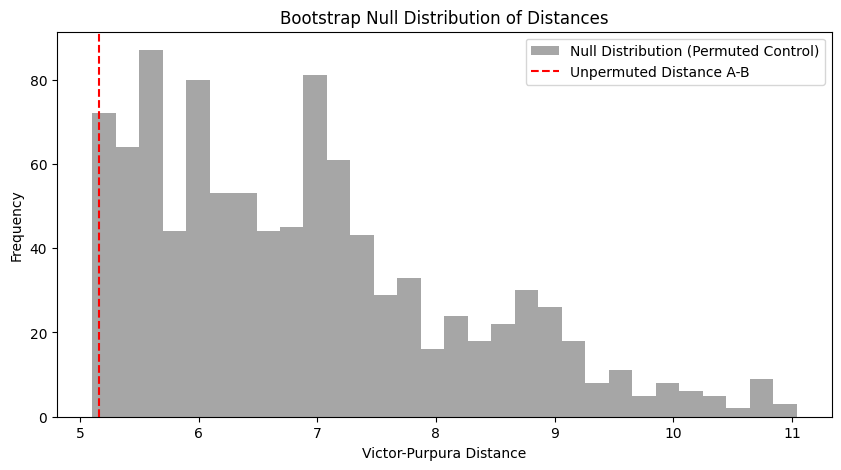

In [42]:
perm_barcode_dist = []
for i in range(1000):
    permuted_barcode1 = permute_barcode(barcode_0, trial_duration)
    perm_barcode_dist.append(spkd(permuted_barcode1, barcode_1, cost))
plt.figure(figsize=(10, 5))
plt.hist(perm_barcode_dist, bins=30, color='gray', alpha=0.7, label="Null Distribution (Permuted Control)")
plt.axvline(x=d, color='red', linestyle='--', label="Unpermuted Distance A-B")
plt.xlabel("Victor-Purpura Distance")
plt.ylabel("Frequency")
plt.title("Bootstrap Null Distribution of Distances")
plt.legend()
plt.show()